<a href="https://colab.research.google.com/github/ipeirotis/autoencoders_census/blob/main/Autoencoder_YRBSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


df = pd.read_csv("sadc_2017only_national_full.csv")
print(df.head().to_markdown())

|    | sitecode   | sitename           | sitetype   |   sitetypenum |   year |   survyear |   weight |   stratum |    PSU |   record |   age |   sex |   grade |   race4 |   race7 |   stheight |   stweight |   bmi |   bmipct |   qnobese |   qnowt | q67                     | q66                      | sexid        | sexid2          |   sexpart |   sexpart2 |   q8 | q9              | q10           | q11           | q12            | q13    | q14    | q15         | q16     | q17          | q18     | q19   | q20     | q21          | q22          | q23   | q24   | q25   | q26   | q27   | q28          | q29                     | q30   | q31                           | q32           | q33                      | q34   | q35    | q36                            | q37    | q38           | q39                            | q40              | q41                 | q42         | q43                           | q44    | q45                           | q46               | q47                   | q48     

In [ ]:
columns_to_drop = ['sitecode', 'sitename', 'sitetype', 'sitetypenum', 'year', 'survyear', 'record']
df = df.drop(columns = columns_to_drop)
df1 = df.iloc[:, :100]

In [ ]:
df1.head()

,weight,stratum,PSU,age,sex,grade,race4,race7,stheight,stweight,...,q80,q81,q82,q83,q84,q85,q86,q87,q88,q89
0,2.4095,111,171190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2 hours per day,1 hour per day,5 days,2 teams,2 times,No,More than 24 months ago,Yes,6 hours,Mostly B's
1,1.6614,212,170890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1 hour per day,5 or more hours per day,5 days,0 teams,0 times,Not sure,During the past 12 months,No,4 or less hours,Mostly B's
2,0.7049,212,170890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4 hours per day,2 hours per day,5 days,0 teams,0 times,No,During the past 12 months,Yes,7 hours,Mostly C's
3,0.7966,212,170890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1 hour per day,3 hours per day,5 days,0 teams,0 times,No,During the past 12 months,No,8 hours,Mostly B's
4,1.9776,202,160270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lst = [216, 232, 242, 245, 247, 249, 251, 252, 253, 256]
df1 = pd.concat([df1, df.iloc[:, lst]], axis=1)
df1.head()

,weight,stratum,PSU,age,sex,grade,race4,race7,stheight,stweight,...,qdrivemarijuana,qhallucdrug,qsportsdrink,qwater,qfoodallergy,qmusclestrength,qindoortanning,qsunburn,qconcentrating,qspeakenglish
0,2.4095,111,171190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0 times,0 times,1 to 3 times,4 to 6 times,Not sure,3 days,0 times,2 times,Yes,Very well
1,1.6614,212,170890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Did not drive,0 times,1 to 3 times,1 time per day,Not sure,4 days,0 times,0 times,Yes,Very well
2,0.7049,212,170890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2 or 3 times,0 times,1 to 3 times,1 to 3 times,No,1 day,0 times,0 times,No,Very well
3,0.7966,212,170890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4 or 5 times,3 to 9 times,Did not drink sports drink,4 or more times per day,No,3 days,0 times,1 time,No,Very well
4,1.9776,202,160270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Did not drive,0 times,1 to 3 times,4 to 6 times,No,NaN,NaN,NaN,NaN,NaN


In [ ]:
dict1 = {
        'age': 'age',
        'sex': 'sex', 'grade':'grade','race4':'Hispanic or Latino','race7':'race',
       'qnobese':'obese','qnowt':'overweight','q67':'sexual identity','q66':'sex/sexual contacts',
       'sexid':'sexid','sexid2':'sexid2','sexpart':'sexpart','sexpart2':'sexpart2','q8':'seat belt use','q9':'riding with a drinking driver',
       'q10':'drinking and driving','q11':'texting and driving','q12':'weapon carrying','q13':'weapon carrying at school',
       'q14':'gun carrying past 12 mos','q15':'safety concerns at school','q16':'threatened at school','q17':'physical fighting',
       'q18':'physical fighting at school','q19':'forced sexual intercourse','q20':'sexual violence','q21':'sexual dating violence',
       'q22':'physical dating violence','q23':'bullying at school','q24':'electronic bullying','q25':'sad or hopeless',
       'q26':'considered suicide','q27':'made a suicide plan','q28':'attempted suicide','q29':'injurious suicide attempt',
       'q30':'ever cigarette use','q31':'initation of cigarette smoking','q32':'current cigarette use','q33':'smoking amounts per day',
       'q34':'electronic vapor product use','q35':'current electronic vapor product use','q36':'EVP from store','q37':'current smokeless tobacco use',
       'q38':'current cigar use','q39':'all tobacco product cessation','q40':'ever alcohol use','q41':'initiation of alcohol use',
       'q42':'current alcohol use','q43':'source of alcohol','q44':'current binge drinking','q45':'largest number of drinks',
       'q46':'ever marijuana use','q47':'initiation of marijuana use','q48':'current marijuana use','q49':'ever cocaine use',
       'q50':'ever inhalant use','q51':'ever heroin use','q52':'ever methamphetamine use','q53':'ever ecstasy use',
       'q54':'ever synthetic marijuana use','q55':'ever steroid use','q56':'ever prescription pain medicine use','q57':'illegal injected drug use',
       'q58':'illegal drugs at school','q59':'ever sexual intercourse','q60':'first sex intercourse','q61':'multiple sex partners',
       'q62':'current sexual activity','q63':'alcohol/drugs at sex','q64':'condom use','q65':'birth control pill use',
       'q68':'perception of weight','q69':'weight loss','q70':'fruit juice drinking','q71':'fruit eating','q72':'green salad eating',
       'q73':'potato eating','q74':'carrot eating','q75':'other vegetable eating','q76':'soda drinking','q77':'milk drinking',
       'q78':'breakfast eating','q79':'physical activity','q80':'television watching','q81':'computer not school work use',
        'q82':'PE attendance','q83':'sports team participation','q84':'concussion in last 12 mos','q85':'HIV testing','q86':'oral health care',
       'q87':'asthma','q88':'sleep on school night','q89':'grades in school', 'qdrivemarijuana':'drive when using marijuana',
       'qhallucdrug':'ever used LSD', 'qsportsdrink':'sports drinks','qwater':'plain water','qfoodallergy':'food allergies',
        'qmusclestrength':'muscle stregthening','qindoortanning':'indoor tanning','qsunburn':'sunburn','qconcentrating':'difficulty concentrating',
        'qspeakenglish':'how well speak English'}

In [ ]:
df1.rename(columns=dict1, inplace = True)

In [ ]:
df1.isnull().sum()

weight                         0
stratum                        0
PSU                            0
age                           81
sex                          127
                            ... 
muscle stregthening         4052
indoor tanning              1751
sunburn                     4056
difficulty concentrating    4097
how well speak English      4054
Length: 110, dtype: int64

In [ ]:
missing_percentages = df1.isnull().mean() * 100
columns_with_missing_gt_25 = missing_percentages[missing_percentages > 25].index

# Select the columns with missing values > 25%
selected_columns = df1[columns_with_missing_gt_25]

# Print the selected columns
print(selected_columns)

      attempted suicide injurious suicide attempt  \
0                   NaN                       NaN   
1                   NaN                       NaN   
2          2 or 3 times                       Yes   
3               0 times   Did not attempt suicide   
4               0 times   Did not attempt suicide   
...                 ...                       ...   
14760               NaN                       NaN   
14761               NaN                       NaN   
14762               NaN                       NaN   
14763               NaN                       NaN   
14764               NaN                       NaN   

        all tobacco product cessation              source of alcohol  \
0      I did not use tobacco products  Did not drink in past 30 days   
1      I did not use tobacco products  Did not drink in past 30 days   
2                                 NaN                            NaN   
3                                  No          Someone gave it to me   
4  

In [ ]:
# Iterate over each variable in the dataframe
for column in selected_columns:
  # create a new column name by appending
  missing_dummy_column = f'{column}_missing_dummy'
  df1[missing_dummy_column] = df1[column].isnull().astype(int)

# Display the updated dataframe
df1.head()

,weight,stratum,PSU,age,sex,grade,Hispanic or Latino,race,stheight,stweight,...,source of alcohol_missing_dummy,largest number of drinks_missing_dummy,ever used LSD_missing_dummy,sports drinks_missing_dummy,plain water_missing_dummy,food allergies_missing_dummy,muscle stregthening_missing_dummy,sunburn_missing_dummy,difficulty concentrating_missing_dummy,how well speak English_missing_dummy
0,2.4095,111,171190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1.6614,212,170890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,0.7049,212,170890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,0,0,0,0,0,0,0
3,0.7966,212,170890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1.9776,202,160270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,1,1,1


In [ ]:
data_num = df1[["weight","stratum","PSU","stheight","stweight","bmi","bmipct","obese","overweight"]]

In [ ]:
data_cat = df1.copy()
data_cat = data_cat.drop(data_num.columns, axis = 1)
data_cat.head()

,age,sex,grade,Hispanic or Latino,race,sexual identity,sex/sexual contacts,sexid,sexid2,sexpart,...,source of alcohol_missing_dummy,largest number of drinks_missing_dummy,ever used LSD_missing_dummy,sports drinks_missing_dummy,plain water_missing_dummy,food allergies_missing_dummy,muscle stregthening_missing_dummy,sunburn_missing_dummy,difficulty concentrating_missing_dummy,how well speak English_missing_dummy
0,NaN,NaN,NaN,NaN,NaN,Heterosexual (straight),Females,Heterosexual,Heterosexual,NaN,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,Bisexual,Never had sexual contact,Bisexual,Sexual Minority,NaN,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,Heterosexual (straight),Males,Heterosexual,Heterosexual,NaN,...,1,1,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,Heterosexual (straight),Females,Heterosexual,Heterosexual,NaN,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,Heterosexual (straight),Never had sexual contact,Heterosexual,Heterosexual,NaN,...,0,0,0,0,0,0,1,1,1,1


In [ ]:
#scale on numerical columns--brings the value of each feature into the range of 0 to 1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
def scaleNum(df_num, cols):
    for col in cols:
        df_num[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(data_num[col])),columns=[col])
    return df_num
data_normal_num = scaleNum(data_num,data_num.columns)

In [ ]:
data_normal_num.head()

,weight,stratum,PSU,stheight,stweight,bmi,bmipct,obese,overweight
0,0.508875,0.088496,0.296542,NaN,NaN,NaN,NaN,NaN,NaN
1,0.347927,0.982301,0.295986,NaN,NaN,NaN,NaN,NaN,NaN
2,0.142144,0.982301,0.295986,NaN,NaN,NaN,NaN,NaN,NaN
3,0.161873,0.982301,0.295986,NaN,NaN,NaN,NaN,NaN,NaN
4,0.415955,0.893805,0.276306,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# label encoding on categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
def scaleCat(df_cat, cols):
    for col in cols:
        df_cat[col] = pd.DataFrame(label_encoder.fit_transform(pd.DataFrame(data_cat[col])),columns=[col])
    return df_cat
data_normal_cat = scaleCat(data_cat,data_cat.columns)

In [ ]:
data_normal_cat.head()

,age,sex,grade,Hispanic or Latino,race,sexual identity,sex/sexual contacts,sexid,sexid2,sexpart,...,source of alcohol_missing_dummy,largest number of drinks_missing_dummy,ever used LSD_missing_dummy,sports drinks_missing_dummy,plain water_missing_dummy,food allergies_missing_dummy,muscle stregthening_missing_dummy,sunburn_missing_dummy,difficulty concentrating_missing_dummy,how well speak English_missing_dummy
0,7,2,4,4,7,2,0,2,0,4,...,0,0,0,0,0,0,0,0,0,0
1,7,2,4,4,7,0,3,0,1,4,...,0,0,0,0,0,0,0,0,0,0
2,7,2,4,4,7,2,2,2,0,4,...,1,1,0,0,0,0,0,0,0,0
3,7,2,4,4,7,2,0,2,0,4,...,0,0,0,0,0,0,0,0,0,0
4,7,2,4,4,7,2,3,2,0,4,...,0,0,0,0,0,0,1,1,1,1


In [ ]:
# merge numerical columns and categorical columns based on their indices
data = data_normal_num.merge(data_normal_cat, left_index = True, right_index = True)

In [ ]:
data.shape

(14765, 123)

In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras import backend as K


# the dimensionality of a latent space in an autoencoder
latent_dimension = 1
batch_size = 20
# the number of nuerons in a hidden layer
hidden_nodes = 16

# create the input layer for the encoder
input_encoder = Input(shape=(123,), name="Input_Encoder")
# apply batch normalization to the encoder input layer
batch_normalize1 = BatchNormalization()(input_encoder)
# create a hidden layer in the encoder
hidden_layer = Dense(hidden_nodes, activation="relu", name="Hidden_Encoding")(
    batch_normalize1
)
batch_normalize2 = BatchNormalization()(hidden_layer)
# create the output layer of the encoder
z = Dense(latent_dimension, name="Mean")(batch_normalize2)

In [ ]:
from keras import Model


encoder = Model(input_encoder, z)

In [ ]:
# create an input layer of the decoder
input_decoder = Input(shape=(latent_dimension,), name="Input_Decoder")
batch_normalize1 = BatchNormalization()(input_decoder)
# create a hidden layer
decoder_hidden_layer = Dense(hidden_nodes, activation="relu", name="Hidden_Decoding")(
    batch_normalize1
)
batch_normalize2 = BatchNormalization()(decoder_hidden_layer)
# create the output layer of the autoencoder
decoded = Dense(123, activation="linear", name="Decoded")(batch_normalize2)

In [ ]:
# specify the input and output layer of the decoder
decoder = Model(input_decoder, decoded, name="Decoder")

In [ ]:
# create a complete autoencoder architecture
encoder_decoder = decoder(encoder(input_encoder))

ae = Model(input_encoder, encoder_decoder)
# a summary of the autoencoder model
ae.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Encoder (InputLayer)  [(None, 123)]             0         
                                                                 
 model_7 (Functional)        (None, 1)                 2557      
                                                                 
 Decoder (Functional)        (None, 123)               2191      
                                                                 
Total params: 4,748
Trainable params: 4,436
Non-trainable params: 312
_________________________________________________________________


In [ ]:
data.fillna(-1, inplace=True)

In [ ]:
from tensorflow.random import set_seed
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# set the seed for random number generation
set_seed(2021)
# compile the complete autoencoder model
ae.compile(loss="mean_squared_error", optimizer="adam")

# use checkpoint during model training
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=1, verbose=0)

# train the autoencoder model on the input data
history = ae.fit(
    data, data, shuffle=True, epochs=10, batch_size=20, validation_split=0.2, verbose=0
).history

In [ ]:
from tensorflow.keras.models import load_model

ae = load_model('model.h5')

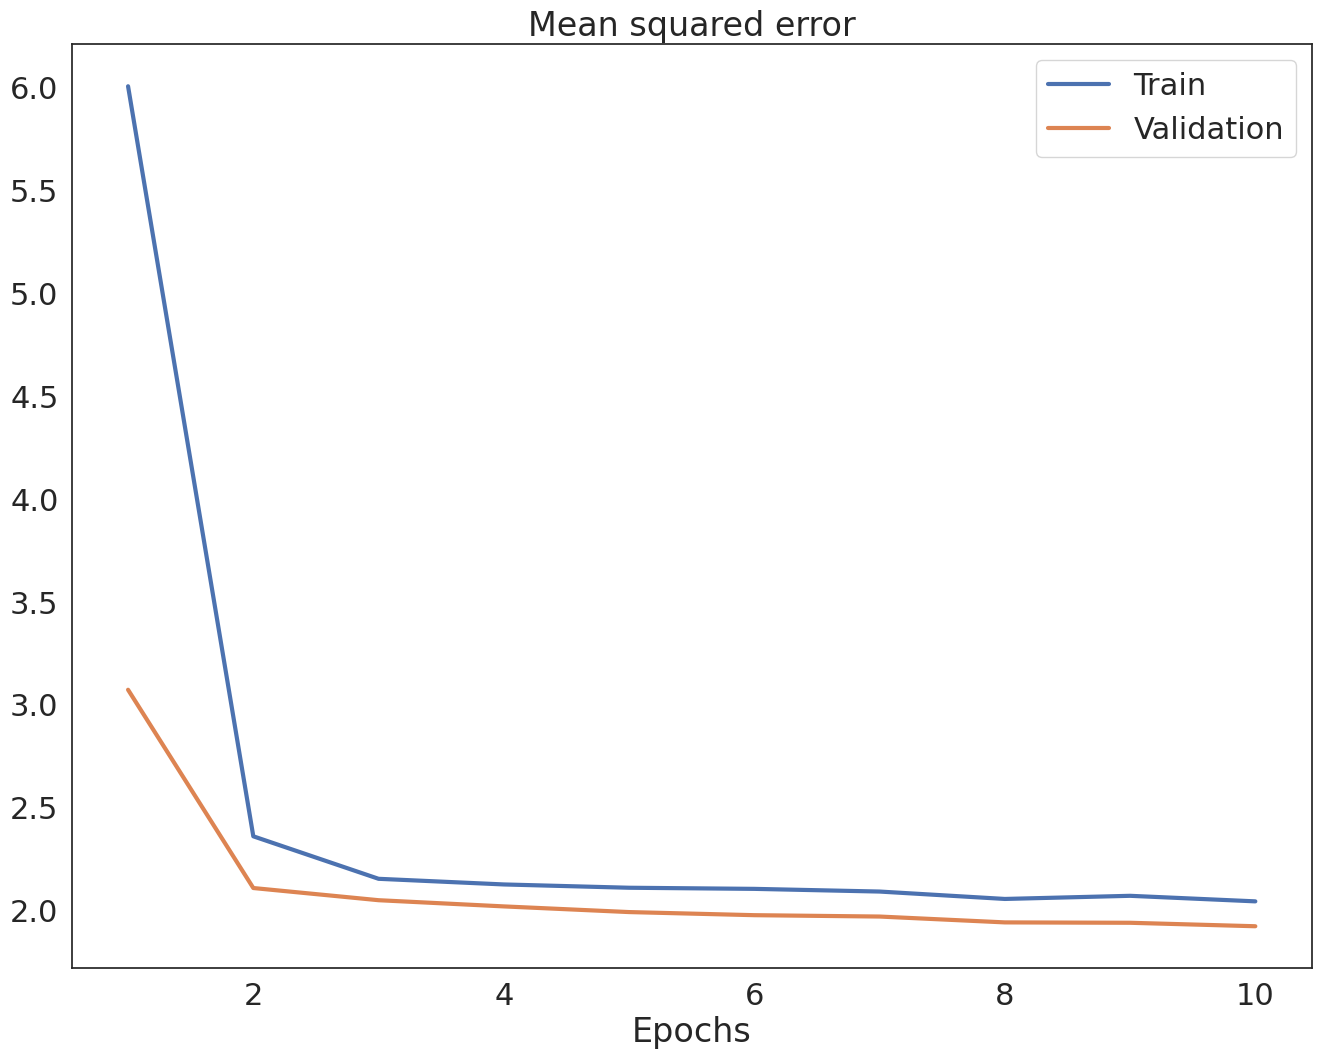

Training MSE = 1.4299492101386153
Validation MSE = 1.3869969478455333


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=2)
sns.set_style("white")


def model_analysis(history):
    # extract the training loss and validation loss values from the history object
    train_loss = history["loss"]
    val_loss = history["val_loss"]
    # x-axis values for the plot
    t = np.linspace(1, len(train_loss), len(train_loss))

    plt.figure(figsize=(16, 12))
    plt.title("Mean squared error")
    # plot the training loss and validation loss against the epoch values on the x-axis
    sns.lineplot(x=t, y=train_loss, label="Train", linewidth=3)
    sns.lineplot(x=t, y=val_loss, label="Validation", linewidth=3)
    plt.xlabel("Epochs")

    plt.legend()
    plt.savefig("FirstNet.png", dpi=400)
    plt.show()
    # the square root of the final training loss and validation loss values
    print(f"Training MSE = {np.sqrt(train_loss[-1])}")
    print(f"Validation MSE = {np.sqrt(val_loss[-1])}")


model_analysis(history)

462/462 [==============================] - 1s 1ms/step


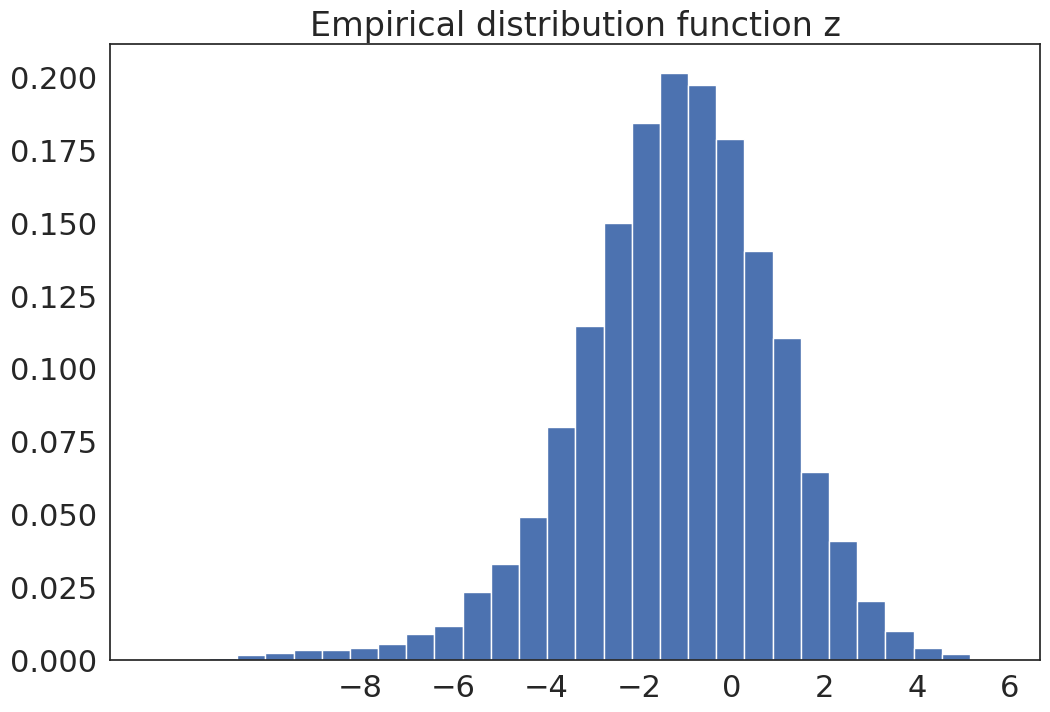

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Empirical distribution function z")
plt.xticks((-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14))
# use the encoder model to obtain the latent representation (z) of the data input
plt.hist(encoder.predict(data), bins=30, density=True)
plt.savefig("DistInternal.png", dpi=400)

In [ ]:
ae.predict(data)[0,:]

462/462 [==============================] - 1s 1ms/step


array([ 0.00705828, -0.03975211, -0.00608176, -0.05670128, -0.258359  ,
        0.35430038,  0.27317205, -0.01528171,  0.06638134,  0.05245792,
        0.06919198, -0.02776475, -0.12710682, -0.1372822 , -0.11360633,
       -0.03837405,  0.02203004,  0.03209102, -0.1332671 , -0.14187735,
        0.0110198 , -0.13229537, -0.13212146, -0.05847887, -0.06587861,
        0.12410407, -0.04608082, -0.17674568,  0.25772914, -0.02157308,
        0.18536781,  0.18780617, -0.16882336,  0.017821  , -0.21000667,
        0.13908657, -0.2522353 ,  0.14671315, -0.01125319, -0.32714555,
        0.2350435 ,  0.04373555, -0.06503583, -0.1568661 , -0.15312915,
        0.22701888, -0.03530421, -0.05849953, -0.04533695,  0.10435688,
       -0.08512194, -0.07590716, -0.01730973,  0.0906215 ,  0.24088424,
        0.19938825,  0.04019078,  0.09343009, -0.20234792,  0.11984493,
       -0.0166283 ,  0.17896366,  0.24741782, -0.08272155,  0.05215348,
       -0.01640527, -0.06633706, -0.09577221, -0.13158043, -0.08

462/462 [==============================] - 1s 1ms/step


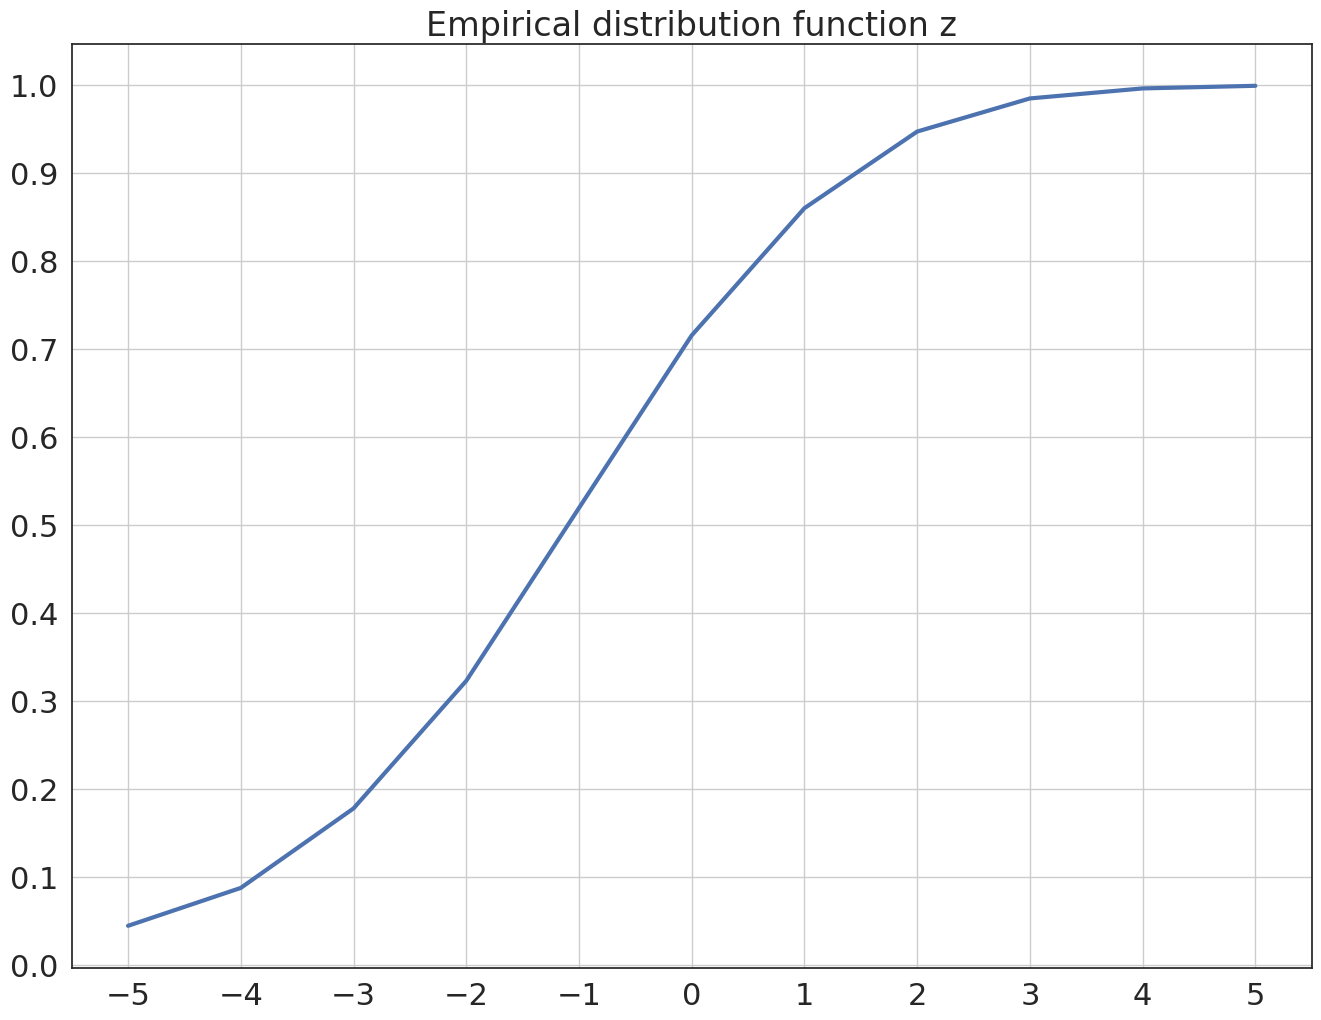

In [ ]:
# plot the empirical distribution function for the values obtained from the encoder's predictions on the dataset
from statsmodels.distributions.empirical_distribution import ECDF


ecdf = ECDF(encoder.predict(data)[:, 0])
plt.figure(figsize=(16, 12))
plt.title("Empirical distribution function z")
x = (-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5)
plt.yticks(np.linspace(0, 1, 11))
plt.xticks(x)
plt.grid()
plt.plot(x, ecdf(x), linewidth=3)
plt.savefig("EmpiricalDF.png", dpi=400)

In [ ]:
from scipy.interpolate import interp1d


x = (-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5)
# calculate the sample EDF values at the specified x-values
sample_edf_values_at_slope_changes = [ecdf(i) for i in x]
inverted_edf = interp1d(sample_edf_values_at_slope_changes, x)

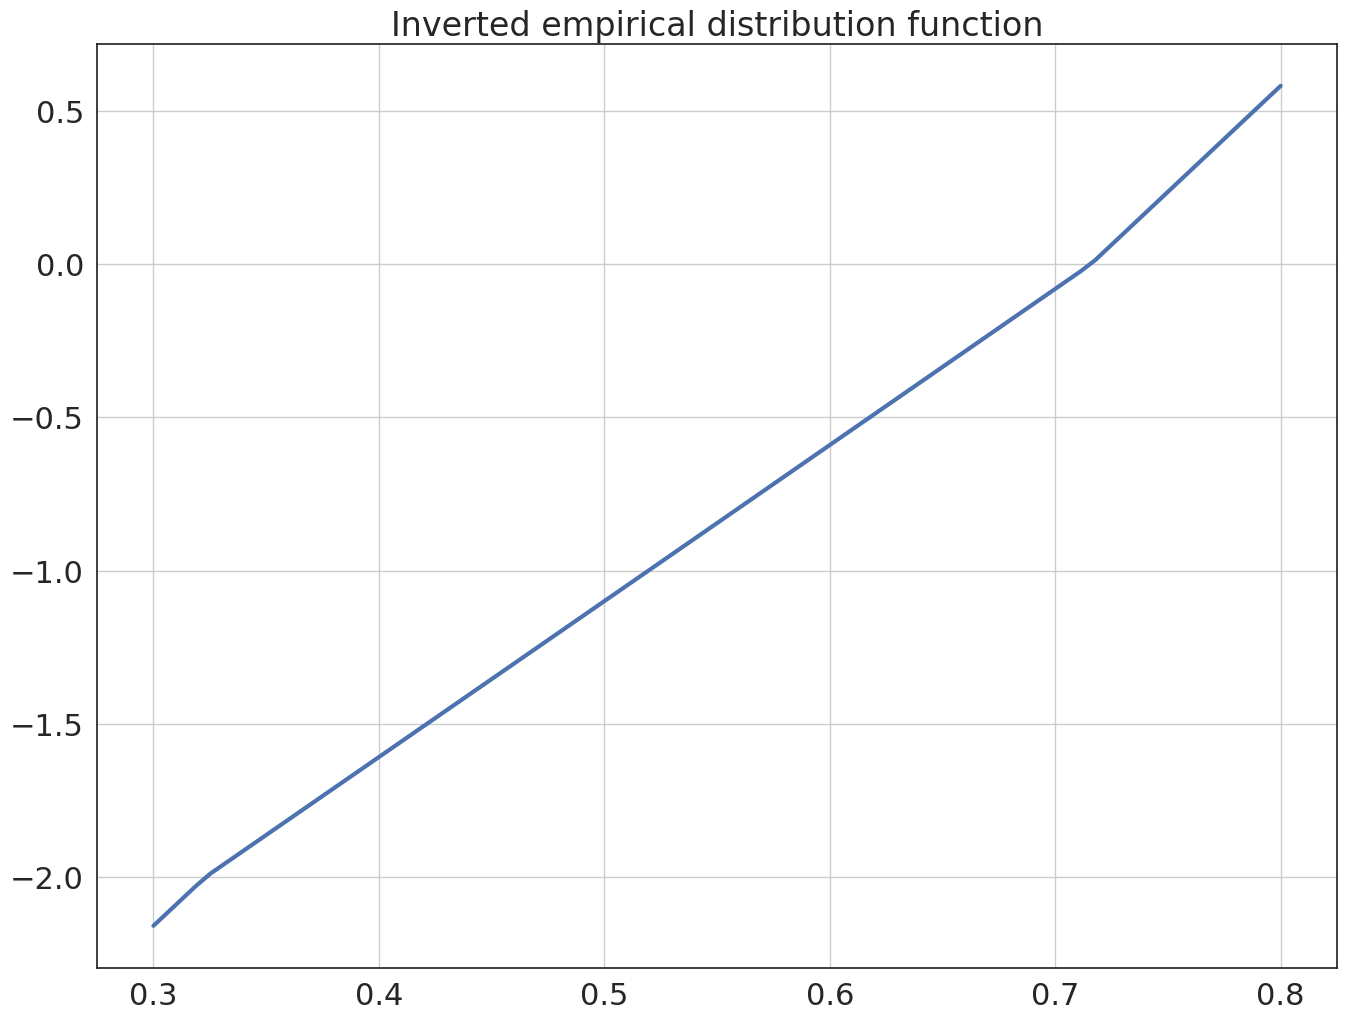

In [ ]:
from numpy.random import uniform
from numpy.random import seed

# number of data points to generate
N = 10000
seed(2021)
plt.figure(figsize=(16, 12))
plt.title("Inverted empirical distribution function")
x = np.linspace(0.30, 0.80, 80)
plt.xticks(np.linspace(0, 1.0, 11))
plt.grid()
plt.plot(x, inverted_edf(x), linewidth=3)
plt.savefig("InvertedEmpiricalDF.png", dpi=400)

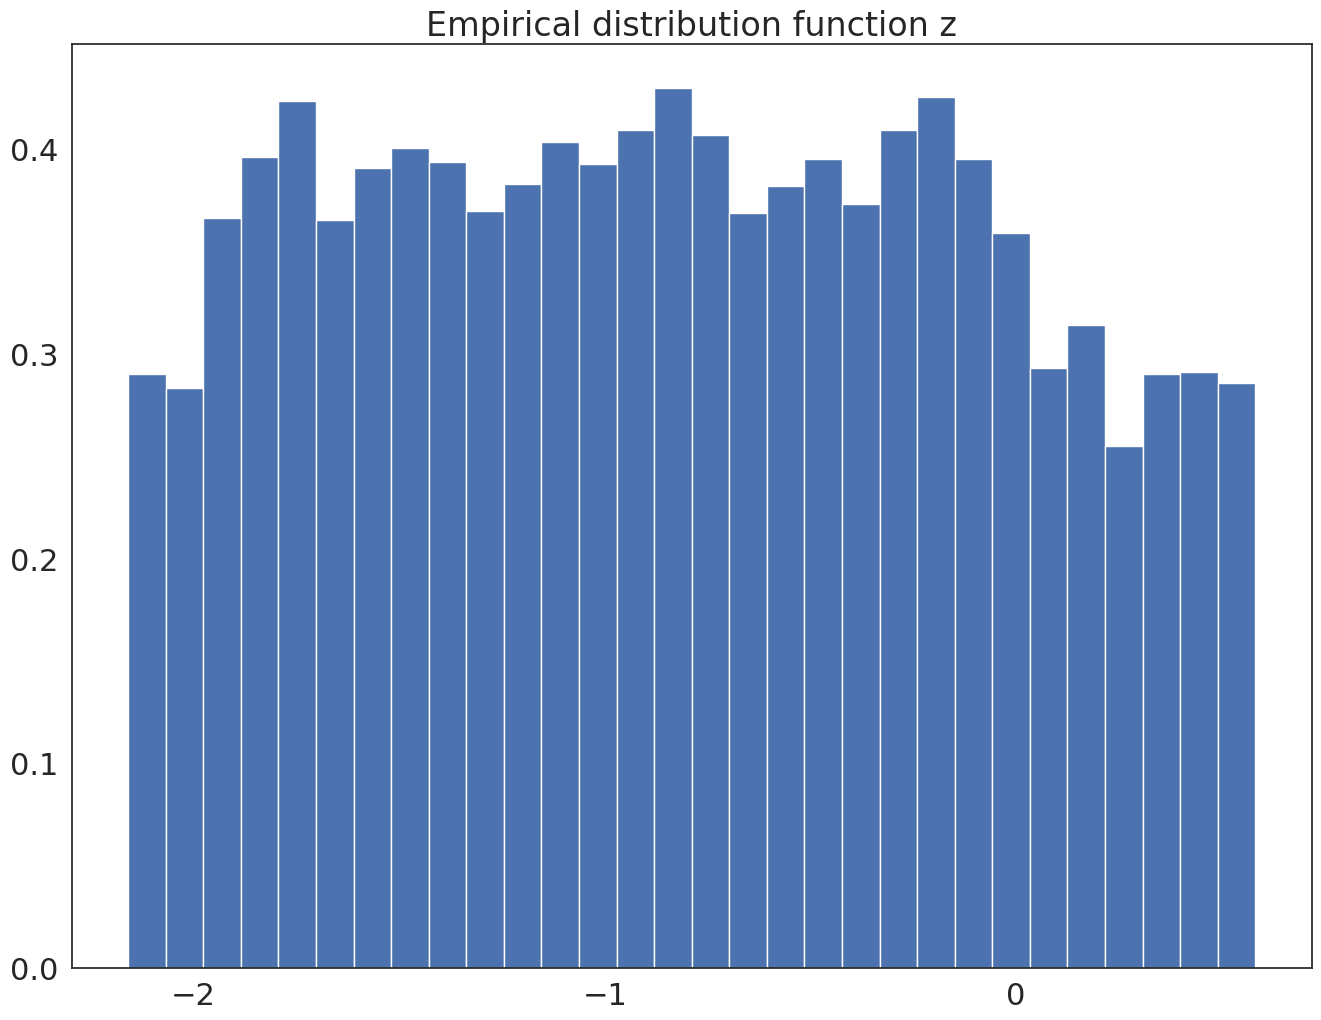

In [ ]:
# number of data points to generate
N = 10000
seed(2021)
plt.figure(figsize=(16, 12))
plt.title("Empirical distribution function z")
plt.xticks((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4))
# N random values from a uniform distribution are transformed to follow a specific distribution using the inverted EDF
plt.hist(inverted_edf(uniform(0.30, 0.80, N)), bins=30, density=True)
plt.savefig("DistGenerated.png", dpi=400)

462/462 [==============================] - 1s 1ms/step


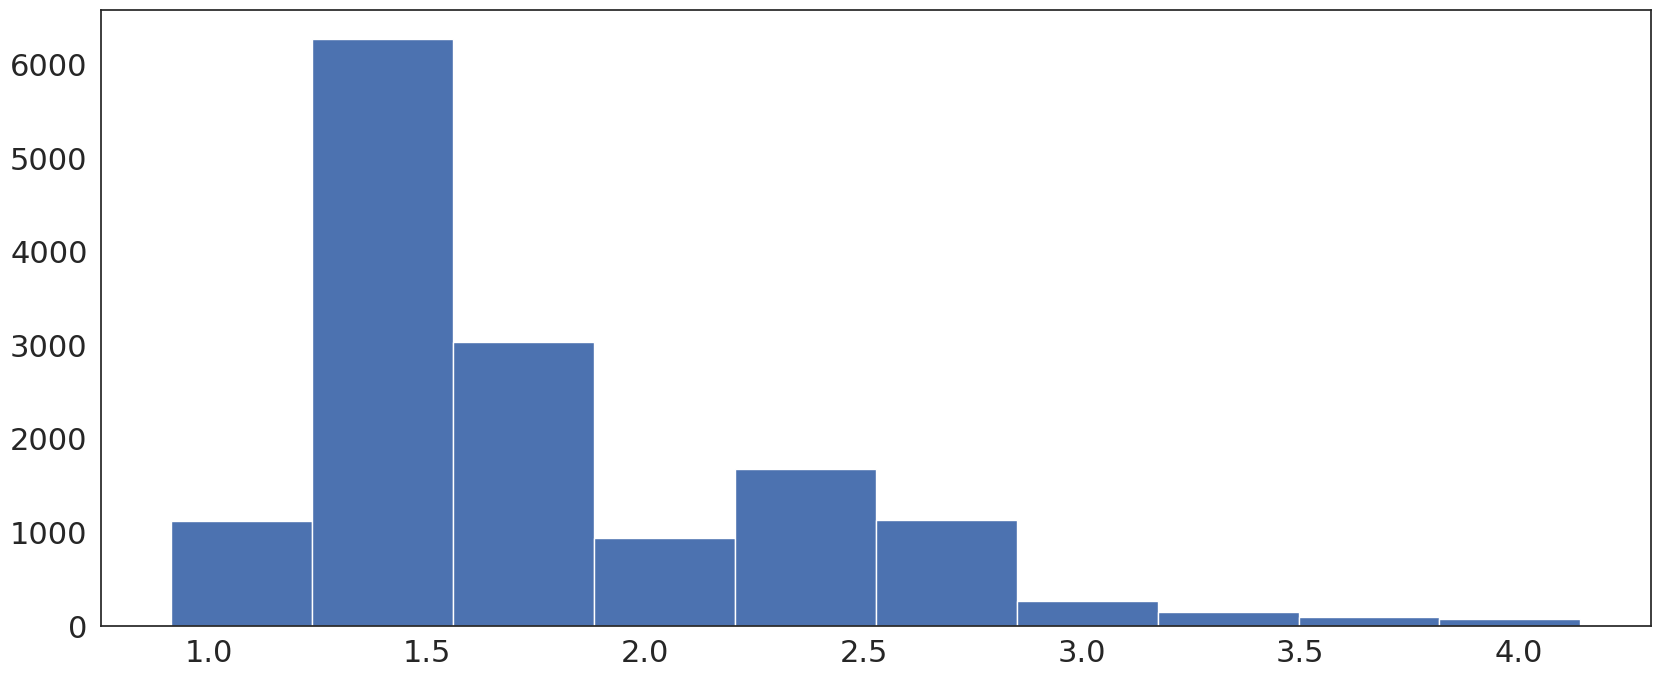

In [ ]:
import tensorflow as tf

plt.figure(figsize=(20, 8))
# reconstruct the original data
normal_reconstructions = ae.predict(data)
# compute the Mean Absolute Error between the reconstructed data and the original data
normal_loss = tf.losses.mae(normal_reconstructions, data)
plt.hist(normal_loss, bins=10)
plt.show()

In [ ]:
threshold = np.mean(normal_loss) + 2*np.std(normal_loss)
print(threshold)

2.860290360466885


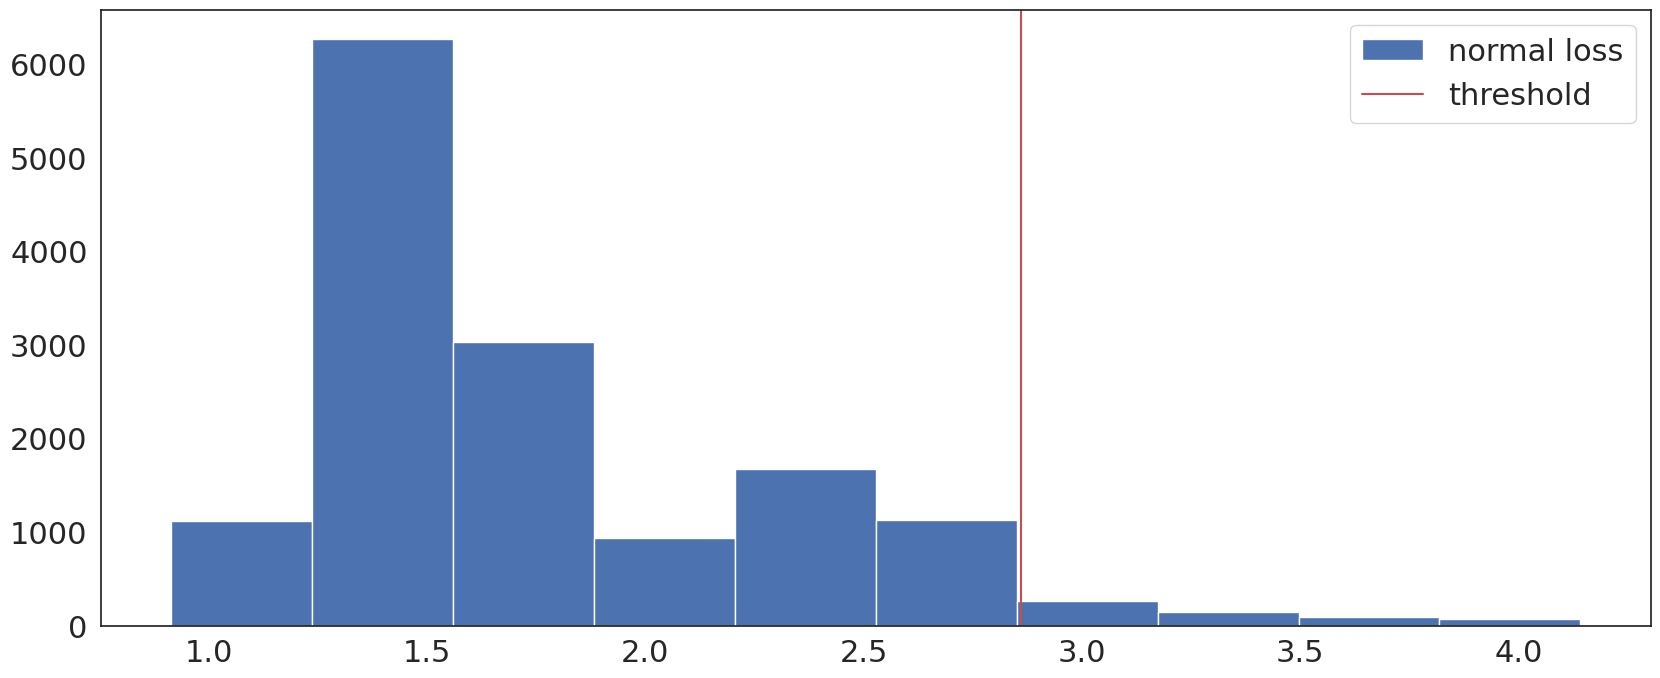

In [ ]:
plt.figure(figsize=(20, 8))
plt.hist(normal_loss, bins=10, color='b', label="normal loss")
# add a vertical line to the plot at the position of the threshold value
plt.axvline(threshold, color='r', label="threshold")
plt.legend()
plt.show()

In [ ]:
# Get the indices that would sort the mae array in descending order
sorted_indices = np.argsort(normal_loss)[::-1]

In [ ]:
k = 100  # Number of samples to select
samples_with_high_error = data.iloc[sorted_indices[:k]]
samples_with_high_error.head()

,weight,stratum,PSU,stheight,stweight,bmi,bmipct,obese,overweight,age,...,source of alcohol_missing_dummy,largest number of drinks_missing_dummy,ever used LSD_missing_dummy,sports drinks_missing_dummy,plain water_missing_dummy,food allergies_missing_dummy,muscle stregthening_missing_dummy,sunburn_missing_dummy,difficulty concentrating_missing_dummy,how well speak English_missing_dummy
9913,0.029711,0.115044,0.424669,0.436620,0.183094,0.091192,0.495649,1.0,1.0,3,...,1,1,1,1,1,1,1,1,1,1
13961,0.165702,0.973451,0.295134,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,6,...,1,1,1,1,1,1,1,1,1,1
168,0.104279,0.991150,0.572366,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,0,...,1,1,1,1,1,1,1,1,1,1
2000,0.178632,0.017699,0.927060,0.676056,0.427326,0.128462,0.964089,0.0,1.0,3,...,1,1,1,1,1,1,1,1,1,1
3294,0.797939,0.893805,0.203180,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,4,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Find indices of tuples with reconstruction values larger than the threshold
anomaly_indices = np.where(normal_loss > threshold)[0]

# Select the corresponding tuples from the original data
anomaly_tuples = data.iloc[anomaly_indices]

# Print the anomaly tuples
anomaly_tuples.head()


,weight,stratum,PSU,stheight,stweight,bmi,bmipct,obese,overweight,age,...,source of alcohol_missing_dummy,largest number of drinks_missing_dummy,ever used LSD_missing_dummy,sports drinks_missing_dummy,plain water_missing_dummy,food allergies_missing_dummy,muscle stregthening_missing_dummy,sunburn_missing_dummy,difficulty concentrating_missing_dummy,how well speak English_missing_dummy
29,0.638196,0.893805,0.276306,-1.0,-1.0,0.157129,-1.0,-1.0,-1.0,7,...,0,0,0,0,0,0,0,0,0,0
61,0.030378,0.008850,0.424892,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,7,...,1,1,1,1,1,1,1,1,1,1
62,0.011661,0.115044,0.424669,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,7,...,1,1,1,1,1,1,1,1,1,1
63,0.018072,0.115044,0.424669,-1.0,-1.0,0.141657,-1.0,-1.0,-1.0,7,...,1,1,1,1,1,1,1,1,1,1
64,0.022762,0.115044,0.424669,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,7,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
anomaly_tuples.shape

(580, 123)